1

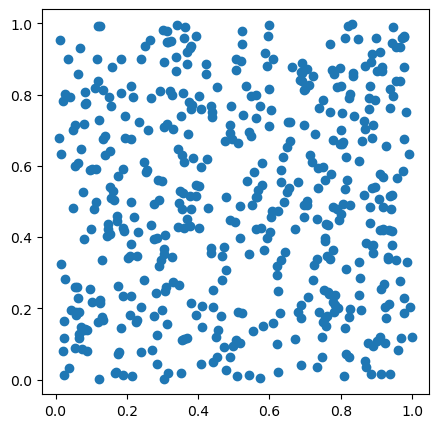

Power_divergenceResult(statistic=21.5, pvalue=0.6090827152142755)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

rng.current = 1

samples = [rng() for _ in range(1000)]
fig = plt.figure(figsize=(5, 5))
fig.patch.set_facecolor('xkcd:white')

plt.scatter(samples[::2], samples[1::2])
plt.axis('equal')
plt.show()
k = 5

def getN(n,os):
  for o in os:
    if  n<o[2]: return o[0]

os = [(i, np.linspace(0, 1, k+1)[i], np.linspace(0, 1, k+1)[i+1]) for i in range(k)]
xys = [(getN(samples[::2][i],os), getN(samples[1::2][i],os)) for i in range(len(samples)//2)]
rs = [v[0]*k+v[1] for v in xys]
f_obs = np.histogram(rs, np.linspace(0, k**2, k**2+1))[0]
f_exp = np.full( k**2, (len(rs) // (k**2)))
stats.chisquare(f_obs, f_exp)

2

In [3]:
from sympy.utilities.iterables import multiset_permutations
import math 
d = 5
ls = range(d)  
ys = [p for p in multiset_permutations(ls)]
ins = [sum([(d ** i )*y[i] for i in range(d)]) for y in ys]

def getOrder(xs,d):
  xs = xs.tolist()
  ys = sorted(xs)
  ys = [xs.index(y) for y in ys]
  return ins.index(sum([(d ** i )*ys[i] for i in range(d)]))

zs =np.asarray(samples).reshape(-1,d)
f_obs = np.histogram([ getOrder(xs,d) for xs in zs],np.linspace(0, math.factorial(d),math.factorial(d)+1))[0]
f_exp = np.full( math.factorial(d), len(zs) / math.factorial(d))
stats.chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=115.59999999999998, pvalue=0.5711054902086635)

3

This sequence looks as random1:
3.051897510886192e-05
0.00018310965970158577
0.0008239871822297573
0.003295936156064272
0.012359732296317816
0.04449496837332845
0.15573221957311034
0.533938602078706
0.8020416363142431
0.006802399177104235
This sequence looks as random2:
0.6013948391191661
0.23232507682405412
0.07114278059452772
0.9577543784398586
0.5738861062563956
0.14762527379207313
0.17685453407466412
0.49876669445075095
0.024663446005433798
0.6612334230449051
Compare:
KstestResult(statistic=0.008437018050998446, pvalue=0.027777953265237354)
KstestResult(statistic=0.029513963367789997, pvalue=0.3417453517955097)


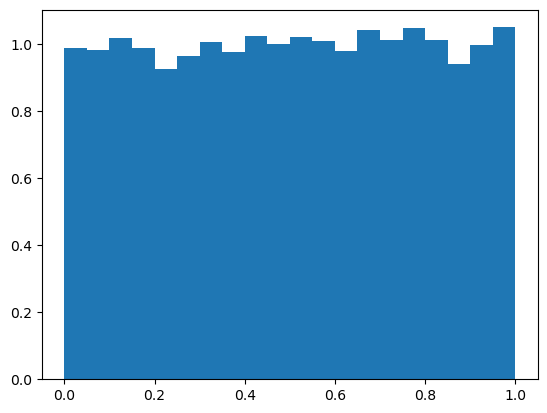

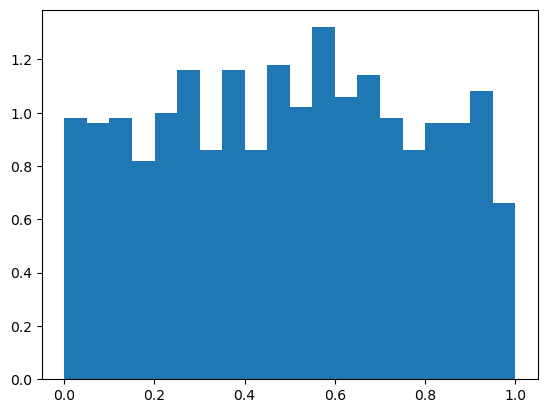

In [4]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

random1 = [rng_bad() for _ in range(30000)]
print("This sequence looks as random1:")
print(*random1[:10], sep='\n')

random2 = [rng()     for _ in range(1000) ]
print("This sequence looks as random2:")
print(*random2[:10], sep='\n')


print("Compare:",
      stats.kstest(random1, stats.uniform.cdf), 
      stats.kstest(random2, stats.uniform.cdf), sep='\n')


fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.hist(random1, 20, density=True)
plt.show()

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.hist(random2, 20, density=True)
plt.show()

4

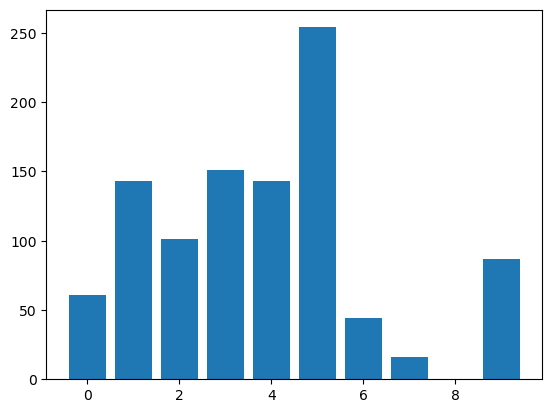

In [5]:
import matplotlib.pyplot as plt
ls = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
lso = ls.tolist()
ls.sort()
ids = [np.where(lso == x)[0][0] for x in ls]
ls/=ls.sum()

df = [ls[:(i+1)].sum() for i in range(len(ls))]
r = [np.random.rand() for i in range(1000)]
zs = np.zeros(len(ls))

for i in range(1000):
    n=0
    while n >= 0:
        if r[i]<df[n]:
            zs[n]+=1
            n=-1
        else:
            n+=1
plt.bar(ids, zs)
plt.show()

5

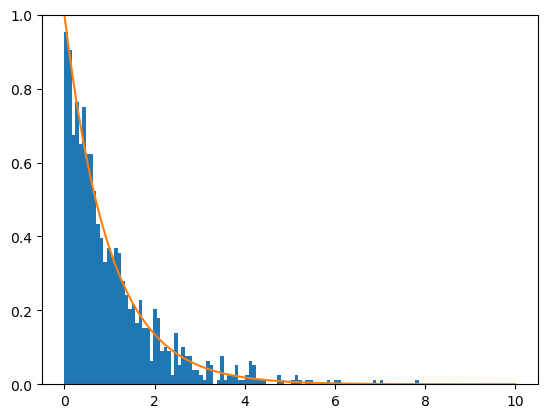

In [6]:
rs = [np.random.rand() for i in range(1000)]

new = np.array([-math.log((1-rs[i])) for i in range (1000)])

xs = np.linspace(0, 10, 100)
xs1=np.array([math.exp(-xs[i]) for i in range (100)])

plt.hist(new,bins = 100,density=True)
plt.ylim(0, 1)
plt.plot(xs, xs1)
plt.show()

6

<Figure size 640x480 with 0 Axes>

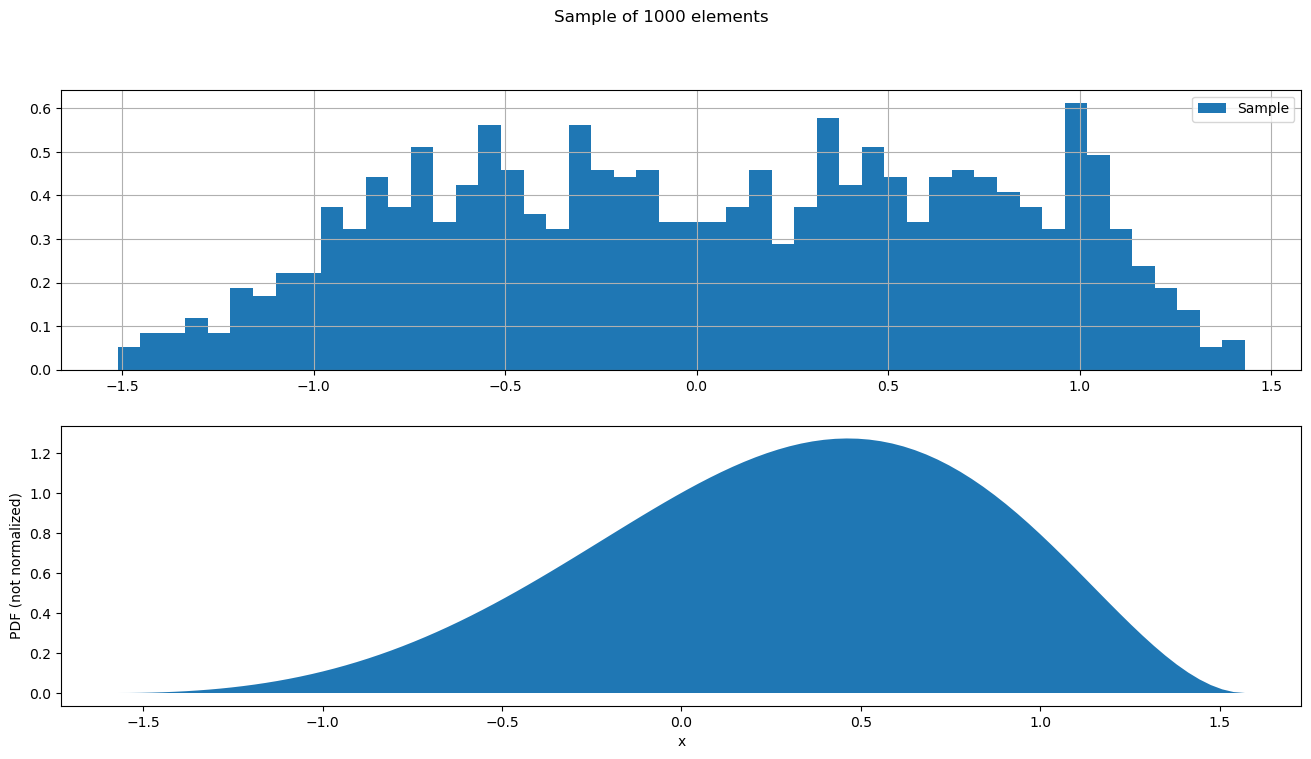

In [7]:
m =  []
for _ in range(1000):
    x = np.pi * np.random.rand() - np.pi / 2.    
    while (np.exp(x) * np.cos(x)**2 < np.random.rand() * (x + np.pi/2.) / np.pi):
        x = np.pi * np.random.rand() - np.pi / 2.        
    m.append(x)    
rnd = np.array(m)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

fig, axs = plt.subplots(2, 1, figsize=(16,8))
fig.suptitle('Sample of 1000 elements')
axs[0].hist(rnd, density=True, label = 'Sample', bins = 50)
axs[0].legend()
axs[0].grid(True)

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x)**2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.show()

7

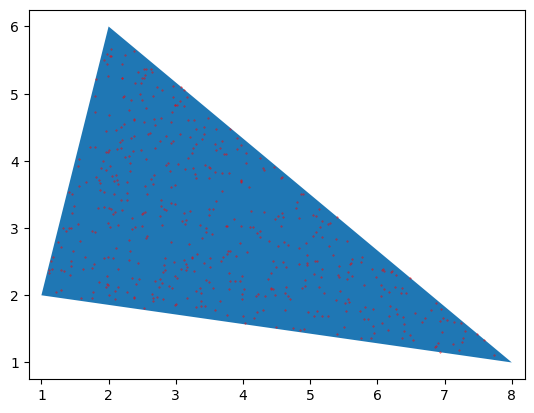

In [8]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')

#распределение в прямоугольнике
n = 500
x = np.array([np.random.rand() for i in range(n)])
y = np.array([np.random.rand() for i in range(n)])

#всё что выше диагонали отражаем под диагональ
x[(x + y) > 1] = 1 - x[(x + y) > 1] 
y[(x + y) > 1] = 1 - y[(x + y) > 1] 

#преобразование системы координат
xx = 7.0*x + y + 1
yy = 4.0*y - x + 2

plt.scatter(xx, yy, color = "r", s=0.1)
plt.show()

8

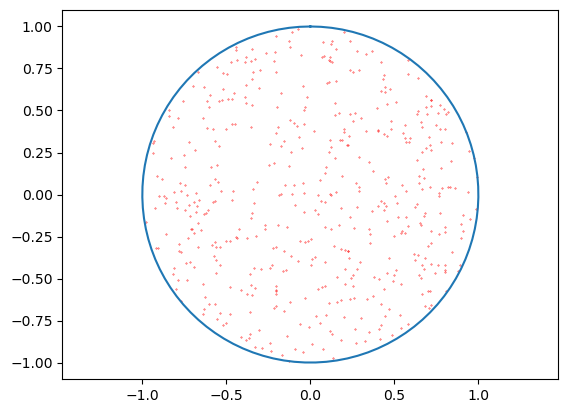

In [9]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')

n = 500
phi = [np.random.rand()*2*np.pi for i in range(n)]
r = [np.sqrt(np.random.rand()) for i in range (n)]

x = r * np.cos(phi)
y = r * np.sin(phi)
plt.scatter(x,y, color = "r", s=0.1)
plt.axis('equal')
plt.show()